In [1]:
import plot_utils
from plot_utils import LogFile,LogFileType,Fig,Roller
import rolling_funcs

WINDOW_SECS=20.0

(1730835500.0, 1730836596.059)

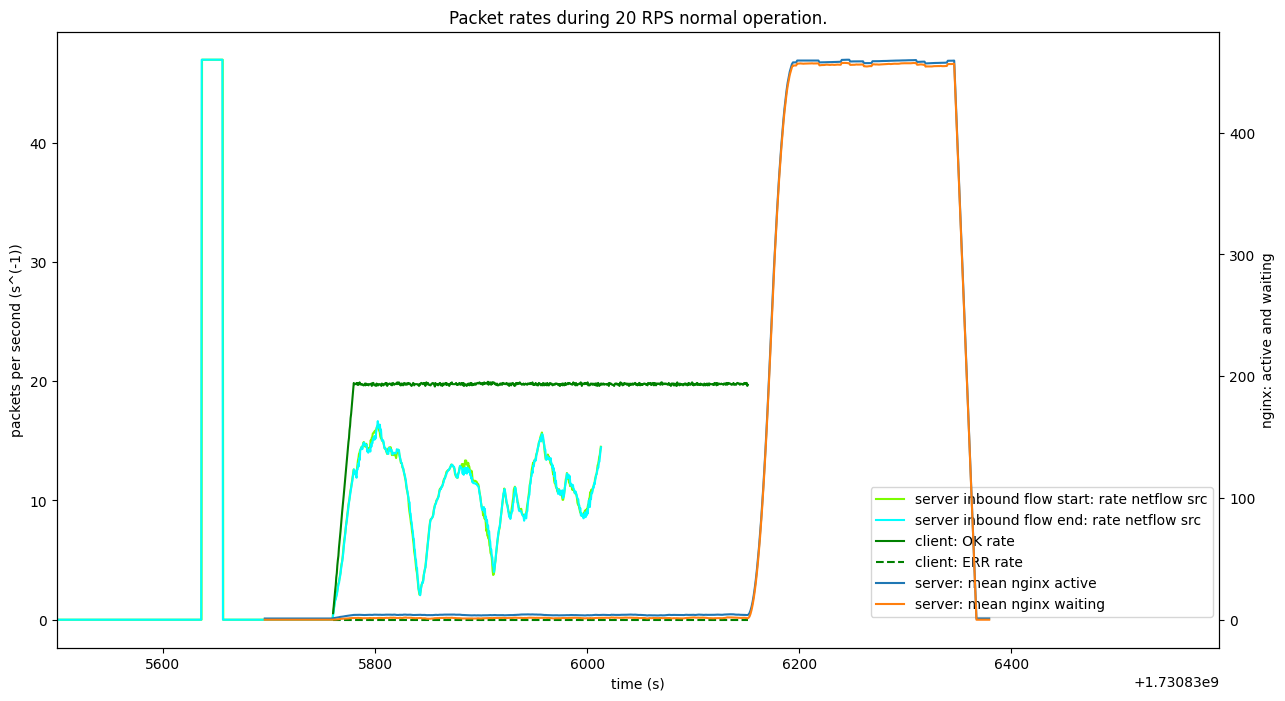

In [ ]:
fig,ax = plot_utils.fig([Fig(title='Packet rates during 20 RPS normal operation.',x='time (s)',y='packets per second (s^(-1))')])

inbound_from_kleene_flow_start = LogFile(LogFileType.TELEGRAF,"../241105_telegraf/logs/hilbert/2024-11-05_19-42.json",
{'telegraf':{
    'netflow':[{'src':{'use_time':'flow_start_ms'}}]
},'color':'lawngreen'})

inbound_from_kleene_flow_end = LogFile(LogFileType.TELEGRAF,"../241105_telegraf/logs/hilbert/2024-11-05_19-42.json",
{'telegraf':{
    'netflow':[{'src':{'use_time':'flow_end_ms'}}]
},'color':'cyan'})

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path="../241105_telegraf/logs/hilbert/2024-11-05_19-42.json",
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
client_log = LogFile(log_type=LogFileType.GOT, path="../241105_telegraf/logs/kleene/2024-11-05_19-42-39.899347.txt",kwargs={'color':'g'})

mean_roller = Roller('mean', rolling_funcs.mean)

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
ax_active, = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black')]
)

packet_rate = Roller('rate', rolling_funcs.count_kleene_packets, rate=True)

plot_utils.overlay_rolling(ax,{'server inbound flow start':inbound_from_kleene_flow_start},[packet_rate],window_secs=WINDOW_SECS,const_stride_secs=0.5)
plot_utils.overlay_rolling(ax,{'server inbound flow end':inbound_from_kleene_flow_end},[packet_rate],window_secs=WINDOW_SECS,const_stride_secs=0.5)
plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active], loc=[0.7,0.05])
# fig.savefig('./plots/20RPS.png')
ax.set_xlim((5500+1.73083e9))

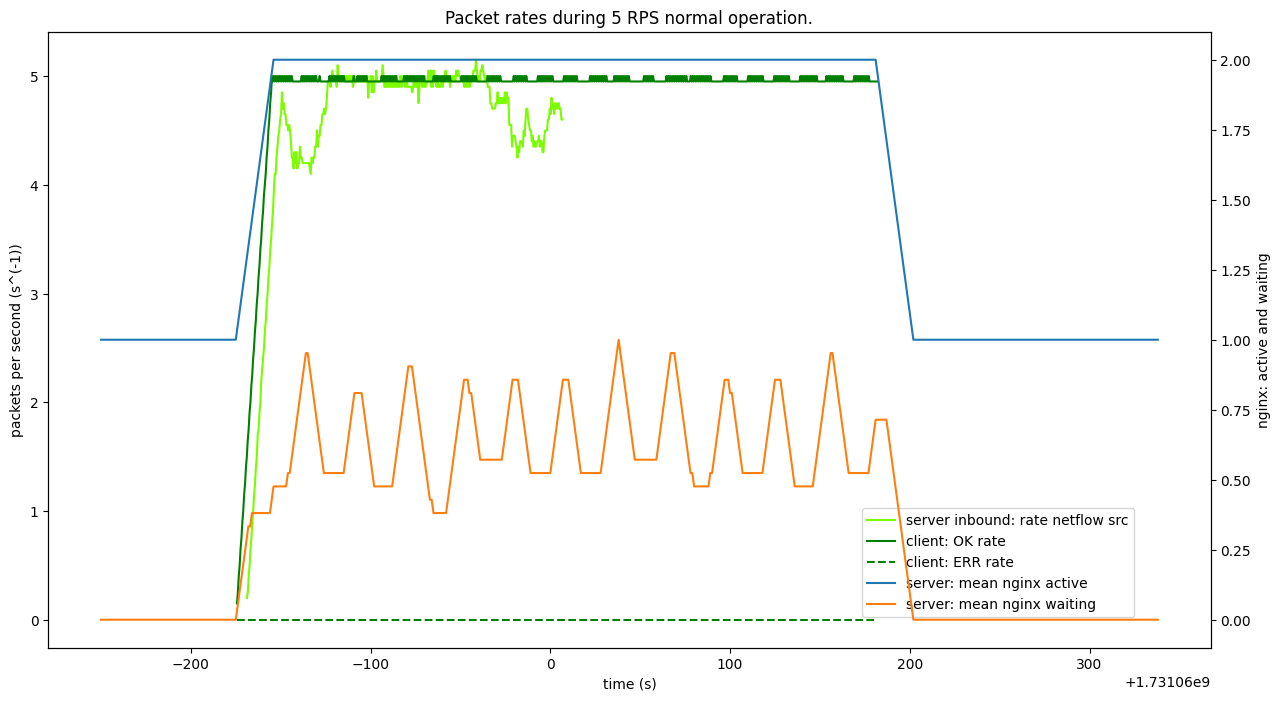

In [ ]:
fig,ax = plot_utils.fig([Fig(title='Packet rates during 5 RPS normal operation.',x='time (s)',y='packets per second (s^(-1))')])

hilbert = LogFile(LogFileType.TELEGRAF,"../241108_diagnose_nginx/logs/hilbert/2024-11-08_09-57.json",
{'telegraf':{
    'netflow':[{'src':{'use_time':'flow_start_ms'}}]
},'color':'lawngreen'})

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path="../241108_diagnose_nginx/logs/hilbert/2024-11-08_09-57.json",
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
client_log = LogFile(log_type=LogFileType.GOT, path="../241108_diagnose_nginx/logs/kleene/2024-11-08_09-57-05.147877.txt",kwargs={'color':'g'})

mean_roller = Roller('mean', rolling_funcs.mean)

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
ax_active, = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black')]
)

packet_rate = Roller('rate', rolling_funcs.count_kleene_packets, rate=True)

plot_utils.overlay_rolling(ax,{'server inbound':hilbert},[packet_rate],window_secs=WINDOW_SECS,const_stride_secs=0.5)
plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active], loc=[0.7,0.05])
# fig.savefig('./plots/20RPS.png')

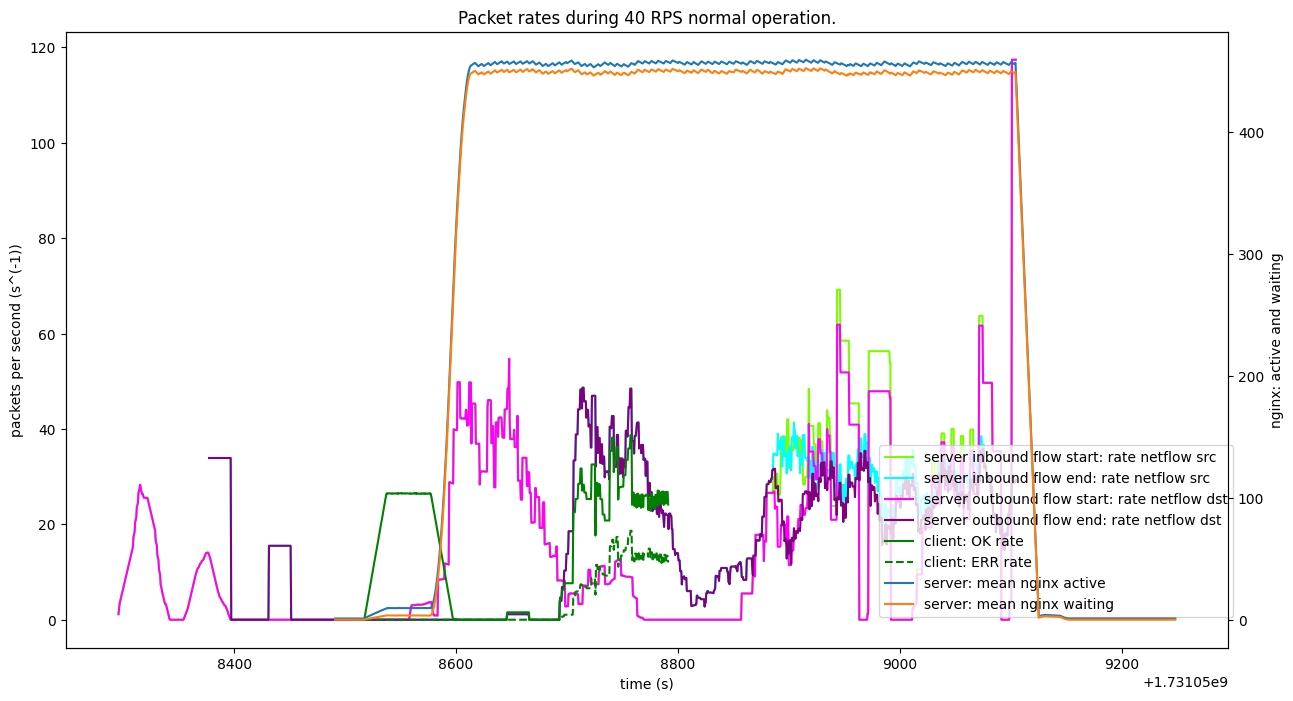

In [ ]:
fig,ax = plot_utils.fig([Fig(title='Packet rates during 40 RPS normal operation.',x='time (s)',y='packets per second (s^(-1))')])

inbound_from_kleene_flow_start = LogFile(LogFileType.TELEGRAF,"../241108_diagnose_nginx/logs/hilbert/2024-11-08_09-35.json",
{'telegraf':{
    'netflow':[{'src':{'use_time':'flow_start_ms'}}]
},'color':'lawngreen'})

inbound_from_kleene_flow_end = LogFile(LogFileType.TELEGRAF,"../241108_diagnose_nginx/logs/hilbert/2024-11-08_09-35.json",
{'telegraf':{
    'netflow':[{'src':{'use_time':'flow_end_ms'}}]
},'color':'cyan'})

outbound_to_kleene_flow_start = LogFile(LogFileType.TELEGRAF,"../241108_diagnose_nginx/logs/hilbert/2024-11-08_09-35.json",
{'telegraf':{
    'netflow':[{'dst':{'use_time':'flow_start_ms'}}]
},'color':'magenta'})

outbound_to_kleene_flow_end = LogFile(LogFileType.TELEGRAF,"../241108_diagnose_nginx/logs/hilbert/2024-11-08_09-35.json",
{'telegraf':{
    'netflow':[{'dst':{'use_time':'flow_end_ms'}}]
},'color':'purple'})

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path="../241108_diagnose_nginx/logs/hilbert/2024-11-08_09-35.json",
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
client_log = LogFile(log_type=LogFileType.GOT, path="../241108_diagnose_nginx/logs/kleene/2024-11-08_09-35-17.057625.txt",kwargs={'color':'g'})

mean_roller = Roller('mean', rolling_funcs.mean)

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
ax_active, = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black')]
)

packet_rate = Roller('rate', rolling_funcs.count_kleene_packets, rate=True)

plot_utils.overlay_rolling(ax,{'server inbound flow start':inbound_from_kleene_flow_start},[packet_rate],window_secs=WINDOW_SECS,const_stride_secs=0.5)
plot_utils.overlay_rolling(ax,{'server inbound flow end':inbound_from_kleene_flow_end},[packet_rate],window_secs=WINDOW_SECS,const_stride_secs=0.5)
plot_utils.overlay_rolling(ax,{'server outbound flow start':outbound_to_kleene_flow_start},[packet_rate],window_secs=WINDOW_SECS,const_stride_secs=0.5)
plot_utils.overlay_rolling(ax,{'server outbound flow end':outbound_to_kleene_flow_end},[packet_rate],window_secs=WINDOW_SECS,const_stride_secs=0.5)
plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active], loc=[0.7,0.05])
# ax.set_ylim(0,20)
# fig.savefig('./plots/20RPS.png')